In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.optimize import minimize, fmin

In [2]:
def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2)    

def g(x):
    return 1 - x**3 + x**5

def h(x):
    return (5 * np.sin(np.exp(0.8 * x))**2 * x**2) / np.exp(x**2 / 2)    

In [3]:
old_settings = np.seterr(all='ignore')

# Задание 1

In [13]:
# минимум и максимум (локальные) для f(x)
opt_mn = minimize(f, 100)
opt_mx = fmin(lambda x: -f(x), 70)
print(opt_mn.x, opt_mx)

Optimization terminated successfully.
         Current function value: -1324.559856
         Iterations: 17
         Function evaluations: 34
[88.71203615] [73.0040741]


In [12]:
# максимум и минимум (локальные) для g(x) (по первой производной)
g_min = -np.sqrt(3/5)
g_max = np.sqrt(3/5)
print(g_min, g_max)

-0.7745966692414834 0.7745966692414834


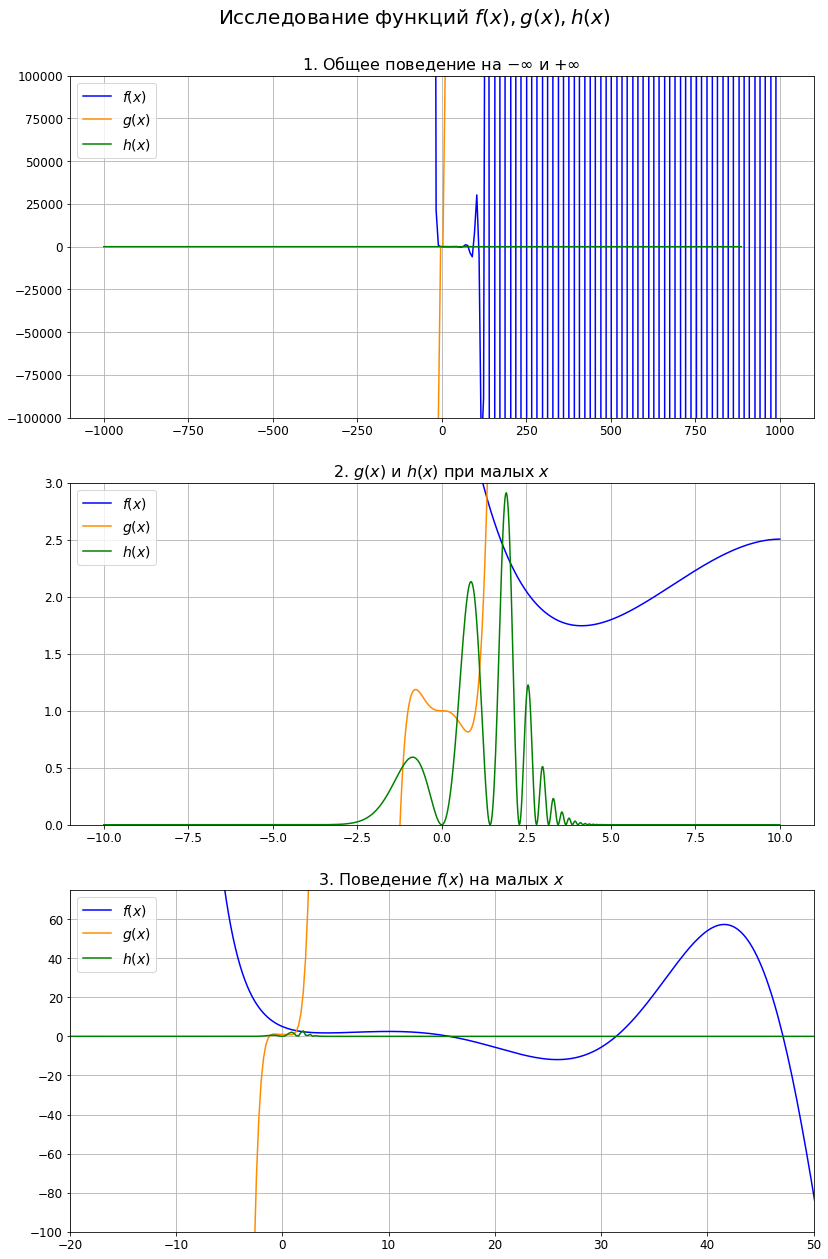

In [6]:
x1 = np.linspace(-1000, 1000, 300)
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
axes[0].plot(x1, f(x1), label='$f(x)$', color='blue')
axes[0].plot(x1, g(x1), label='$g(x)$', color='darkorange')
axes[0].plot(x1, h(x1), label='$h(x)$', color='green')
axes[0].grid()
axes[0].legend(fontsize=14)
axes[0].set_title('1. Общее поведение на $-\\infty$ и $+\\infty$', fontsize=16)
axes[0].set_ylim(-100000, 100000)
axes[0].tick_params(labelsize=12)

x2 = np.linspace(-10, 10, 1000)
axes[1].plot(x2, f(x2), label='$f(x)$', color='blue')
axes[1].plot(x2, g(x2), label='$g(x)$', color='darkorange')
axes[1].plot(x2, h(x2), label='$h(x)$', color='green')
axes[1].grid()
axes[1].legend(fontsize=14)
axes[1].set_ylim(0, 3)
axes[1].set_title('2. $g(x)$ и $h(x)$ при малых $x$', fontsize=16)
axes[1].tick_params(labelsize=12)

x3 = np.linspace(-100, 120, 1000)
axes[2].plot(x3, f(x3), label='$f(x)$', color='blue')
axes[2].plot(x3, g(x3), label='$g(x)$', color='darkorange')
axes[2].plot(x3, h(x3), label='$h(x)$', color='green')
axes[2].grid()
axes[2].legend(fontsize=14)
axes[2].set_ylim(-100, 75)
axes[2].set_xlim(-20, 50)
axes[2].set_title('3. Поведение $f(x)$ на малых $x$', fontsize=16)
axes[2].tick_params(labelsize=12)


fig.suptitle('Исследование функций $f(x), g(x), h(x)$', fontsize=20)
fig.tight_layout(pad=2.5)

* Функция $f(x)$ при $x \to +\infty$  не является периодической в строгом смысле (хотя ведет себя похоже). С ростом $x$ амплитуда колебаний увеличивается экспоненциально. Функция принимает положительные и отрицательные значения  через некоторый период (возможно, $10\pi$). При отрицательных $x$ функция стремится к $+\infty$.


* При $x > 0$ $g(x) > 0$. При $x < 0$ $g(x) < 0$. При $x = 0$ $g(x) = 1$. При $x < -\sqrt{0.6}$ $g(x)$ возрастает. При $-\sqrt{0.6} < x < \sqrt{0.6}$ $g(x)$ убывает (кроме $x = 0$). При $x > \sqrt{0.6}$ $g(x)$ возрастает. То есть $-\sqrt{0.6}$ и $+\sqrt{0.6}$ - локальные минимум и максимум соответственно. Точками перегиба функции являются $-\sqrt{0.3}, 0, \sqrt{0.3}$. Таким образом, функция является **выпуклой** на промежутках ($-\infty; -\sqrt{0.3}$), ($0; \sqrt{0.3}$). **Вогнутой** - на промежутках ($-\sqrt{0.3}, 0$), ($\sqrt{0.3}$, +$\infty$)


* Функция $h(x)$ является положительно определенной. При стремлении $x \to -\infty$ и $x \to +\infty$ $h(x) \to 0$. Так при $x \to -\infty$ $e^{0.8x} \to 0$, а значит $sin(e^{0.8x})$ также стремится к 0. Напротив, при $x \to +\infty$ знаменатель $e^{x^2 / 2}$ будет стремится к бесконечности, а, следовательно, дробь к 0.<br>

# Задание 2

In [7]:
for i in np.arange(0, 2.5, 0.001): 
    if abs(f(i) - g(i)) < 0.01:
        a = i
        break

In [8]:
a2 = []
for i in np.arange(0, 2.5, 0.001):
    if abs(f(i) - h(i)) < 0.01:
        a2.append(i)
a2 = np.array((min(a2), max(a2)))
print(a2)


[1.795 2.031]


In [9]:
a3 = []
for i in np.arange(-1.5, 1.5, 0.001):
    if abs(g(i) - h(i)) < 0.004: 
        a3.append(i)
a3.remove(a3[2])
a3 = np.array(a3)
print(a3)

[-1.149  0.456  1.121]


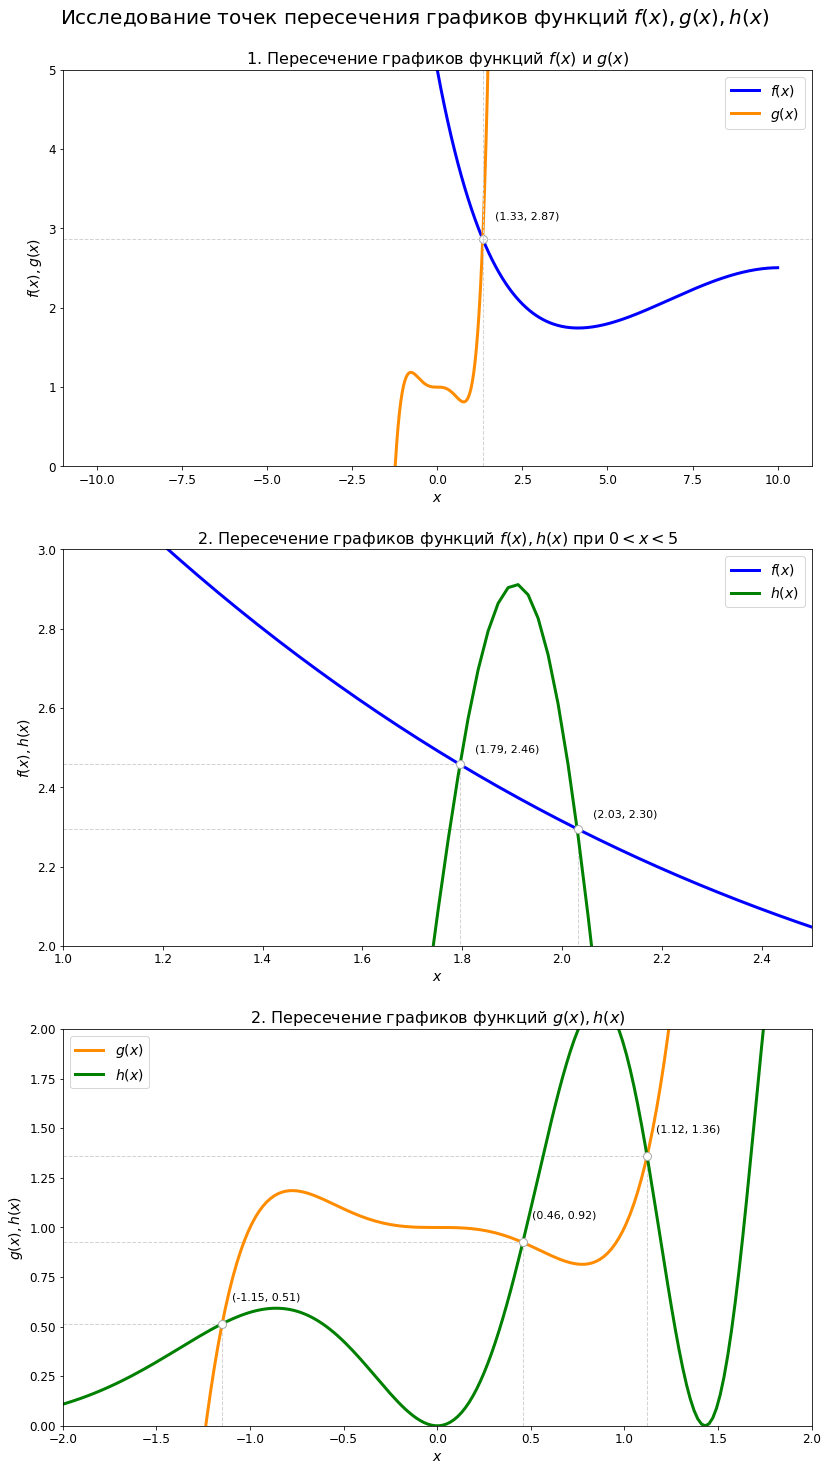

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(12, 21))

# f(x) и g(x)
axes[0].plot(x2, f(x2), color='blue', lw=3, label='$f(x)$')
axes[0].plot(x2, g(x2), color='darkorange', lw=3, label='$g(x)$')
axes[0].set_ylim(0, 5)
axes[0].plot(a, f(a), 'o', ms=8, color='white', markeredgecolor='darkgray')
# axes[0].grid()
axes[0].set_xlabel('$x$', fontsize=14)
axes[0].set_ylabel('$f(x), g(x)$', fontsize=14)
axes[0].tick_params(labelsize=12)
axes[0].set_title('1. Пересечение графиков функций $f(x)$ и $g(x)$', fontsize=16)
axes[0].legend(fontsize=14)
axes[0].axvline(a, color='lightgray', ls='--', lw=1)
axes[0].axhline(f(a), color='lightgray', ls='--', lw=1)
axes[0].text(a + 0.35, f(a) + 0.25, f'({a:.2f}, {f(a):.2f})', fontsize=11)

# f(x) и h(x)
axes[1].plot(x2, f(x2), color='blue', lw=3, label='$f(x)$')
axes[1].plot(x2, h(x2), color='green', lw=3, label='$h(x)$')
axes[1].set_xlim(1, 2.5)
axes[1].set_ylim(2, 3)
axes[1].plot(a2, f(a2), 'o', ms=8, color='white', markeredgecolor='darkgray')
for i in a2:
    axes[1].vlines(i, ymax = f(i), ymin = 0, color='lightgray', ls='--', lw=1)
    axes[1].hlines(f(i), xmin=1, xmax=i, color='lightgray', ls='--', lw=1)
    axes[1].text(i + 0.03, f(i) + 0.03, f'({i:.2f}, {f(i):.2f})', fontsize=11)
axes[1].set_xlabel('$x$', fontsize=14)
axes[1].set_ylabel('$f(x), h(x)$', fontsize=14)
axes[1].tick_params(labelsize=12)
axes[1].set_title('2. Пересечение графиков функций $f(x), h(x)$ при $0 < x < 5$', fontsize=16)
axes[1].legend(fontsize=14)

# g(x) и h(x)
axes[2].plot(x2, g(x2), label='$g(x)$', color='darkorange', lw=3)
axes[2].plot(x2, h(x2), label='$h(x)$', color='green', lw=3)
axes[2].set_xlim(-2, 2)
axes[2].set_ylim(0, 2)
axes[2].plot(a3, g(a3), 'o', ms=8, color='white', markeredgecolor='darkgray')
for i in a3: 
    axes[2].vlines(i, ymax=g(i), ymin=0, color='lightgray', ls='--', lw=1)
    axes[2].hlines(g(i), xmin=-2, xmax=i, color='lightgray', ls='--', lw=1)
    axes[2].text(i + 0.05, g(i) + 0.12, f'({i:.2f}, {g(i):.2f})', fontsize=11)
axes[2].set_xlabel('$x$', fontsize=14)
axes[2].set_ylabel('$g(x), h(x)$', fontsize=14)
axes[2].set_title('2. Пересечение графиков функций $g(x), h(x)$', fontsize=16)
axes[2].tick_params(labelsize=12)
axes[2].legend(fontsize=14)

fig.suptitle('Исследование точек пересечения графиков функций $f(x), g(x), h(x)$', fontsize=20)
fig.tight_layout(pad=2.5)

Все три графика функций $f(x), g(x), h(x)$ пересекаются между собой. 

* Функции $f(x)$ и $g(x)$ пересекаются в точке (1.33; 2.87). 


* Функции $f(x)$ и $h(x)$ на интервале [0; 5] пересекаются в точках (1.79; 2.46), (2.03; 2.3), однако при $x \to +\infty$ графики пересекаются бесконечное количество раз, что можно заметить по рисункам 1, 3 задания 1.



* Функции $g(x)$ и $h(x)$ пересекаются между собой в трех точках - (-1.15; 0.51), (0.46; 0.92) и (1.12; 1.36).